<a href="https://colab.research.google.com/github/MatthiasSimons/covid-analysis/blob/main/covid_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programmierung und Auswertung großer Datenmengen
## Analyse der Covid-19 Fallzahlen und Impfungen

# Einleitung
...

Vorgehensweise


*   Importieren
*   Bereinigen
*   Modifizieren
*   Modellieren
*   Validieren
*   Bewerten
*   Zusammenfassen

# Gliederung
CRoos Industry Standard Process for Data Mining (CRISP-DM)

1.   Business Understanding
2.   Data Understanding
3.   Data Preperation
4.   Modelling
5.   .... 



## Vorbereitung

Importieren der Bibliotheken



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Business Understanding
... 

# 2. Data Understanding
- zwei Datensätze über die Covid19 Fallzahlen und Impfrate (Link einfügen)

## 2.1 Importieren der Daten

In [ ]:
url_fallzahlen = "https://raw.githubusercontent.com/ocaktans/Gathering-Covid-19-Data/73623b5057979a4bca4ffdf931cc29222ad7a58e/Covid-19%20Dataset.csv"
url_impfungen = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv"
fallzahlen = pd.read_csv(url_fallzahlen, sep=',')
fallzahlen.name = "Fallzahlen"
impfungen = pd.read_csv(url_impfungen, sep=',')
impfungen.name = "Impfungen"

fallzahlen.set_index(["Date"], inplace = True)
impfungen.rename(columns = {"date": "Date"}, inplace = True)
impfungen.set_index(["Date"], inplace = True)

## 2.2 Beschreibung der Daten

### Datensatz: Covid-19 Fallzahlen

Bei dem Covid-19-Data Datensatz handelt es sich um einen Datensatz der die Entwicklung der Covid-19 Fallzahlen weltweit täglich abbildet.

In [ ]:
fallzahlen.head()

,Unnamed: 0,Country,Confirmed,Recovered,Deaths,Active Cases,Death Rate(%),Increase,FirstDays,day_xth,Population_1k,TenCase,Cases/1000s
Date,,,,,,,,,,,,,
2020-01-22,0,Afghanistan,0,0,0,0,0.0,0,2020-02-24,0,38928,2020-03-11,0.0
2020-01-23,1,Afghanistan,0,0,0,0,0.0,0,2020-02-24,0,38928,2020-03-11,0.0
2020-01-24,2,Afghanistan,0,0,0,0,0.0,0,2020-02-24,0,38928,2020-03-11,0.0
2020-01-25,3,Afghanistan,0,0,0,0,0.0,0,2020-02-24,0,38928,2020-03-11,0.0
2020-01-26,4,Afghanistan,0,0,0,0,0.0,0,2020-02-24,0,38928,2020-03-11,0.0


Der Datensatz besteht aus 14 Spalten die im folgenden kurz beschrieben werden:
- Country: Land
- Date: Datum
- Confirmed: Kumulative bestätigte Fälle
- Recovered: Kumulative Genesene Fälle
- Deaths: Kumulative Verstorbene
- Active Cases: Aktive Fälle
- Death Rate(%):
- Increase: Tägliche Steigerung der bestätigten Fälle
- FirstDays: Tag an dem der erste Fall gemeldet wurde
- day_xth: verstrichene Tage seit dem ersten gemeldeten Fall
- Population_1k: Einwohnerzahl in Tausend
- TenCase: Tag an dem Zehn Fälle gemeldet wurden
- Cases/1000s: Fälle pro Tausend Einwohner

### Datensatz: Covid-19 Impfrate

Bei diesem Datensatz handelt es sich um einen Datensatz der die Entwicklung der Covid-19 Impfungen weltweit täglich abbildet

In [ ]:
impfungen.head()

,location,iso_code,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
Date,,,,,,,,,,,
2021-02-22,Afghanistan,AFG,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2021-02-23,Afghanistan,AFG,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
2021-02-24,Afghanistan,AFG,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
2021-02-25,Afghanistan,AFG,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
2021-02-26,Afghanistan,AFG,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0


Der Datensatz besteht aus 12 Spalten die im folgenden kurz beschrieben werden:
- location: Land
- iso_code: Kodierung des Landes
- date: Datum
- total_vaccinations: Anzahl Impfungen
- people_vaccinated: Geimpfte Personen
- people_fully_vaccinated: Vollständig geimpfte Personen
- daily_vaccinations_raw: Tägliche Impfungen (Roh)
- daily_vaccinations: Tägliche Impfungen
- total_vaccinations_per_hundred: Anzahl Impfungen auf 100 Einwohner
- people_vaccinated_per_hundred: Anzahl geimpfte Personen auf 100 Einwohner
- people_fully_vaccinated_per_hundred: Anzahl vollständig geimpfte Personen auf 100 Einwohner
- daily_vaccinations_per_million: Anzahl Impfungen auf eine Millionen Einwohner

# 3. Data Preperation
Verbesserung der Datenqualität durch:

*   Zusammenfassen zu einem Dataframe
*   Löschen von Zellen
*   Leere Zellen



## 3.1 Zusammenfassen zu einem Datensatz

In [ ]:
# geht das?

## 3.2 Daten säubern

*   Prüfung und Umgang mit fehlenden Daten



In [ ]:
def get_null_columns(df):
      print("Es fehlen",str(df.isnull().sum().sum()), "Einträge in", str(df.name))
      return [index for index in df.isnull().sum().index if df.isnull().sum()[index] > 0]

fallzahlen_null_columns = get_null_columns(fallzahlen)
impfungen_null_columns = get_null_columns(impfungen)
print("fehlende Spalten in Fallzahlen",fallzahlen_null_columns)
print("fehlende Spalten in Impfungen",impfungen_null_columns)

Es fehlen 2415 Einträge in Fallzahlen
Es fehlen 71691 Einträge in Impfungen
fehlende Spalten in Fallzahlen ['TenCase']
fehlende Spalten in Impfungen ['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'daily_vaccinations_raw', 'daily_vaccinations', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million']


Im Datensatz Fallzahlen fehlen nur in der Spalte "TenCase" Daten. Da die Spalte für die Auswertung nicht weiter relevant ist, wird sie gelöscht.

In [ ]:
try:
  fallzahlen.drop(columns="TenCase", inplace = True, axis = 1)
except:
  print("Zelle bereits ausgeführt")

print("Es fehlen ",str(fallzahlen.isnull().sum().sum()), " Einträge in Fallzahlen")

Es fehlen  0  Einträge in Fallzahlen


Im Datensatz "Impfungen" fehlen in 9 von 12 Spalten Werte.

In [ ]:
impfungen.isnull().sum()

location                                   0
iso_code                                   0
total_vaccinations                      8692
people_vaccinated                       9444
people_fully_vaccinated                12165
daily_vaccinations_raw                 10637
daily_vaccinations                       226
total_vaccinations_per_hundred          8692
people_vaccinated_per_hundred           9444
people_fully_vaccinated_per_hundred    12165
daily_vaccinations_per_million           226
dtype: int64

- unklare Datenlage in vielen Ländern
- Auswahl der Länder mit der besten Datenlage

In [ ]:
locations = impfungen["location"].unique()
location_null_count = {}
for location in locations:
  null_count_abs = impfungen[impfungen["location"] == location].isnull().sum().sum()
  len_rows = len(impfungen[impfungen["location"] == location])
  len_columns = len(impfungen[impfungen["location"] == location].columns)

  null_count_rel = 100*null_count_abs/(len_rows*len_columns)

  location_null_count[location] = [null_count_abs, null_count_rel]
location_null_count = df.from_dict(location_null_count, orient='index', columns=["abs. Null Values", "rel. Null Values"])
location_null_count
location_null_count["rel. Null Values"].sort_values().head()

Germany           0.183038
European Union    0.183038
Scotland          0.621118
England           0.684932
Belgium           0.798526
Name: rel. Null Values, dtype: float64

Länder Auswahl:

*   Europa: Deutschland (Germany)
*   Nordamerika: USA (United States )
*   Südamerika: Chile 
*   ....



## Datensatz zusammenfassen

In [ ]:
fallzahlen_germany = fallzahlen[fallzahlen["Country"] == "Germany"]
impfungen_germany = impfungen[impfungen["location"] == "Germany"]
dataset_germany = pd.concat([fallzahlen_germany, impfungen_germany], axis=1)

In [ ]:
try:
  dataset = pd.concat([fallzahlen, impfungen], axis=1)
  print("Datensatz zusammengefügt")
  dataset.head()

except:
  print("Datensatz bereits zusammengefügt")
  dataset.head()

Datensatz bereits zusammengefügt


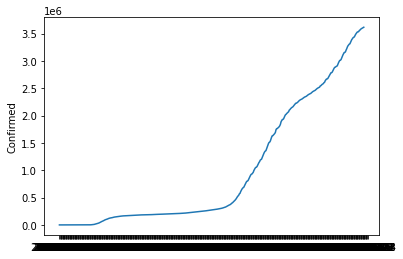

In [ ]:
sns.lineplot(x = dataset_germany.index, y= "Confirmed", data=dataset_germany)